In [ ]:
from google.colab import drive #구글드라이브와 연동
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import requests
from bs4 import BeautifulSoup

response = requests.get("https://www.weather.go.kr/weather/observation/currentweather.jsp")
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
table = soup.find('table', {'class' : 'table_develop3'})
data = []

In [ ]:
for tr in table.find_all('tr'):
  tds = list(tr.find_all('td'))
  
  for td in tds:
    if td.find('a'):
      point = td.find('a').text
      temperature = tds[5].text
      humidity = tds[9].text
      data.append([point, temperature, humidity])

data

[['강릉', '24.2', '62'],
 ['강진군', '27.1', '59'],
 ['강화', '22.3', '83'],
 ['거제', '24.7', '64'],
 ['거창', '24.9', '61'],
 ['경주시', '26.1', '56'],
 ['고산', '22.9', '87'],
 ['고창', '24.5', '59'],
 ['고창군', '24.5', '57'],
 ['고흥', '27.2', '56'],
 ['광양시', '24.7', '63'],
 ['광주', '26.3', '57'],
 ['구미', '24.1', '75'],
 ['군산', '23.3', '63'],
 ['금산', '23.9', '64'],
 ['김해시', '22.9', '79'],
 ['남원', '24.3', '65'],
 ['남해', '24.2', '65'],
 ['대관령', '19.3', '74'],
 ['대구', '25.3', '55'],
 ['대전', '24.0', '74'],
 ['동두천', '23.6', '76'],
 ['동해', '20.8', '69'],
 ['목포', '25.6', '62'],
 ['문경', '23.1', '67'],
 ['밀양', '25.8', '53'],
 ['백령도', '22.9', '87'],
 ['보령', '22.1', '72'],
 ['보성군', '27.7', '55'],
 ['보은', '23.9', '69'],
 ['봉화', '22.2', '65'],
 ['부산', '21.9', '74'],
 ['부안', '24.4', '65'],
 ['부여', '24.0', '67'],
 ['북강릉', '23.1', '58'],
 ['북창원', '25.2', '66'],
 ['북춘천', '24.1', '70'],
 ['산청', '25.8', '57'],
 ['상주', '24.0', '71'],
 ['서귀포', '24.8', '68'],
 ['서산', '22.7', '75'],
 ['서울', '23.9', '69'],
 ['성산', '25.0', '65']

In [ ]:
with open('/gdrive/My Drive/Colab Notebooks/weather.csv', 'w') as file:
  file.write("point,temperature,humidity\n")
  for i in data:
    file.write("{},{},{}\n".format(i[0],i[1],i[2]))

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/weather.csv", index_col = "point")

In [ ]:
city_df = df.loc[['서울','인천','대구','대전','광주','부산','울산']]

In [ ]:
%config InlineBackend.figure_format = 'retina' 
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath).get_name()

In [ ]:
plt.rc('font', family = 'NanumBarunGothic')
mpl.font_manager._rebuild()

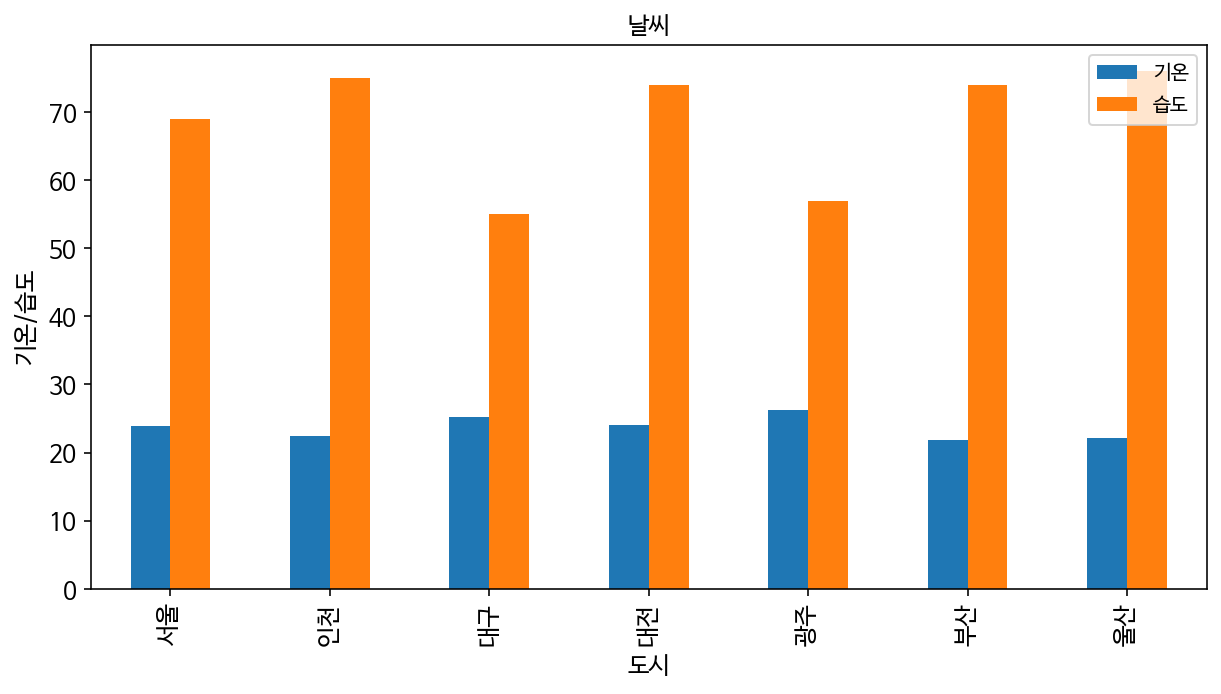

In [ ]:
ax = city_df.plot(kind = 'bar', title = '날씨', figsize = (10, 5), legend = True, fontsize = 12)
ax.set_xlabel('도시', fontsize = 12)
ax.set_ylabel('기온/습도', fontsize = 12)
ax.legend(['기온', '습도'], fontsize = 10)